In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [2]:
import torch
from PIL import Image
import os
import zipfile
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [3]:
from google.colab import files
files.upload()  # Для загрузки kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"natalliapatashkevich","key":"3244424a336bc8bc0196154831f75ed5"}'}

In [4]:
# Директорию для хранения ключей Kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

# Переместите kaggle.json в нужное место
!cp /content/yolov5/kaggle.json /root/.kaggle/


# Скачайте датасет с Kaggle
!kaggle datasets download -d siddharthkumarsah/ships-in-aerial-images

# Распакуйте скачанный файл (если это zip-файл)
with zipfile.ZipFile('ships-in-aerial-images.zip', 'r') as zip_ref:
    zip_ref.extractall('ships-in-aerial-images')

Dataset URL: https://www.kaggle.com/datasets/siddharthkumarsah/ships-in-aerial-images
License(s): CC-BY-SA-4.0
100% 353M/353M [00:21<00:00, 20.0MB/s]
100% 353M/353M [00:21<00:00, 17.0MB/s]


In [5]:
# Проверьте содержимое загруженной директории
os.listdir('ships-in-aerial-images')

['ships-aerial-images']

In [6]:
!cat /content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml

train: /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images
val: /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images
test: /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images

nc: 1
names: ['ship']

In [7]:
# Откройте файл в текстовом редакторе, например nano
!sed -i 's#/kaggle/input#/content/yolov5#g' /content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml

In [ ]:
# # Train!
# !python /content/yolov5/train.py --batch 16 --epochs 2 --data /content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml --weights yolov5n.pt

2024-08-01 07:58:23.243358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 07:58:23.263178: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 07:58:23.269229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=/content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=

In [8]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 5 --data /content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml --weights yolov5s.pt --name my_yolov5s_model

2024-08-01 11:45:47.449197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 11:45:47.711252: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 11:45:47.786724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!python /content/yolov5/train.py --help

2024-08-01 12:17:13.642060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 12:17:13.662254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 12:17:13.668405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP] [--epochs EPOCHS]
                [--batch-size BATCH_SIZE] [--imgsz IMGSZ] [--rect] [--resume [RESUME]] [--nosave]
                [--noval] [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--evolve_population EVOLVE_POPULATION] [--resume_evolve RESUME_EVOLVE]
       

In [12]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 10 --data /content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml --weights yolov5m.pt --name my_yolov5m_model --save-period 1 --project /content/drive/MyDrive/yolov5_weights

2024-08-01 12:18:25.570006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 12:18:25.589772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 12:18:25.595885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights

In [13]:
# Если обучение прервалось, вы можете загрузить последнюю сохраненную модель и продолжить с нее.
# Путь к сохраненным моделям
weights_dir = '/content/drive/MyDrive/yolov5_weights/'

# Выводим список файлов
print(os.listdir(weights_dir))

['my_yolov5m_model']


In [ ]:
# Указываем путь к последнему сохраненному файлу
last_saved_weights = '/content/drive/MyDrive/yolov5_weights/my_yolov5m_model/weights/last.pt'

!python /content/yolov5/train.py --img 640 --batch 16 --epochs 10 --data /content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml --weights {last_saved_weights} --name my_yolov5m_model_continued --save-period 1 --project /content/drive/MyDrive/yolov5_weights


2024-08-01 13:22:50.812191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 13:22:50.833466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 13:22:50.839586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/drive/MyDrive/yolov5_weights/my_yolov5m_model/weights/last.pt, cfg=, data=/content/yolov5/ships-in-aerial-images/ships-aerial-images/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/

In [ ]:
model = torch.hub.load(
    # будем работать с локальной моделью в текущей папке
    repo_or_dir = '.',
    # непредобученная – будем подставлять свои веса
    model = 'custom',
    # путь к нашим весам
    path='/content/yolov5/runs/train/exp8/weights/best.pt',
    # откуда берем модель – наша локальная
    source='local'
    )

YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


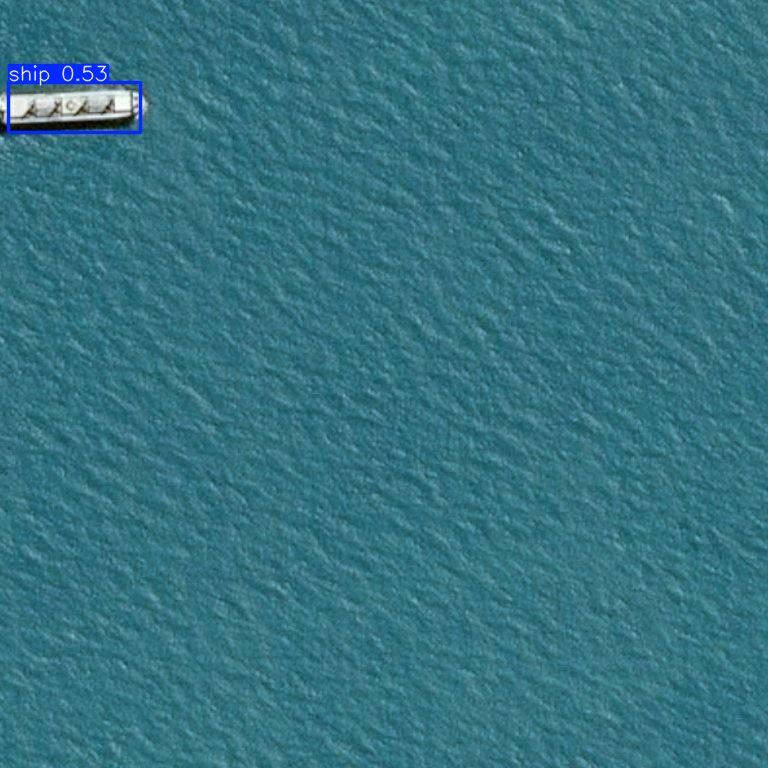

In [ ]:
import torchvision.transforms as T
# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.05
# Читаем картинку
img = T.ToPILImage()(read_image('/content/yolov5/ships-in-aerial-images/ships-aerial-images/test/images/44332fe33_jpg.rf.47a101f4dfc54c4a7ffe1ddd1f63c60e.jpg'))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()